In [1]:
#NEED TO RESTART KERNEL TO LOAD CHANGES TO IMPORTS :(

import sys
# caution: path[0] is reserved for script path (or '' in REPL).
sys.path.insert(1, './../src')

from data_loader import load_compressed_data
from energy_channels import EnergyChannel
from plot_tools import plot_L_vs_Time, plot_L_CUT
import datetime
import matplotlib.pyplot as plt
import spacepy.time
import numpy as np


scale = 0.9
#NEED TO RESTART KERNEL TO LOAD CHANGES TO IMPORTS :(

This unreleased version of SpacePy is not supported by the SpacePy team.


Loading REPT data between: 2013-05-01 00:00:00 and 2013-07-01 00:00:00.
Loading : REPT_201305_A.npz
Loading : REPT_201306_A.npz
Loading : REPT_201307_A.npz


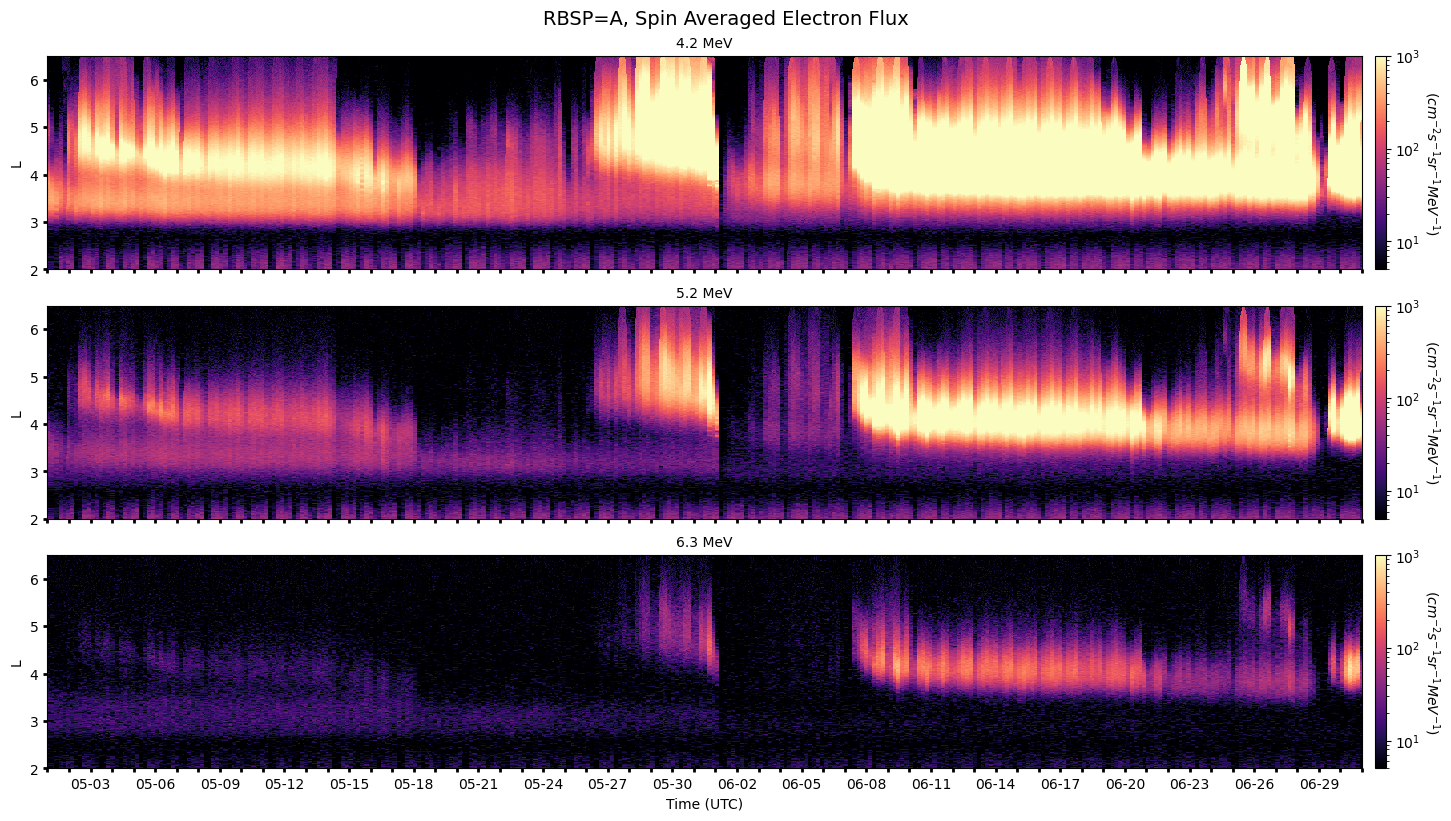

In [2]:
start = datetime.datetime(year = 2013, month = 5, day = 1)
end = datetime.datetime(year = 2013, month = 7, day = 1)
satellite = "A"

data = load_compressed_data(satellite=satellite, start=start, end=end)

fig, axs = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(16 * scale, 9 * scale)
fig.set_layout_engine("constrained")
plot_L_vs_Time(refs=data, energy_channel=EnergyChannel.MeV_4_2, flux_max=1e3, axis=axs[0])
plot_L_vs_Time(refs=data, energy_channel=EnergyChannel.MeV_5_2, flux_max=1e3, axis=axs[1])
plot_L_vs_Time(refs=data, energy_channel=EnergyChannel.MeV_6_3, flux_max=1e3, axis=axs[2])

start, end = axs[-1].get_xlim()
axs[-1].xaxis.set_ticks(np.arange(start, end + 1, 1))

xticks = axs[-1].get_xticks()
dt_xticks = spacepy.time.Ticktock(xticks, "JD").getUTC()
labels = [date.strftime("%m-%d") for date in dt_xticks]
axs[-1].set_xticks(xticks, labels)
axs[-1].set_xlabel("Time (UTC)")

for i, label in enumerate(axs[-1].xaxis.get_ticklabels()):
        
    label.set_visible((i+1) % 3 == 0)
    

#plt.tight_layout()
fig.suptitle(f"RBSP={satellite}, Spin Averaged Electron Flux", fontsize = 14)
plt.show()

fig.savefig("./test.pdf", dpi=100, format="pdf")

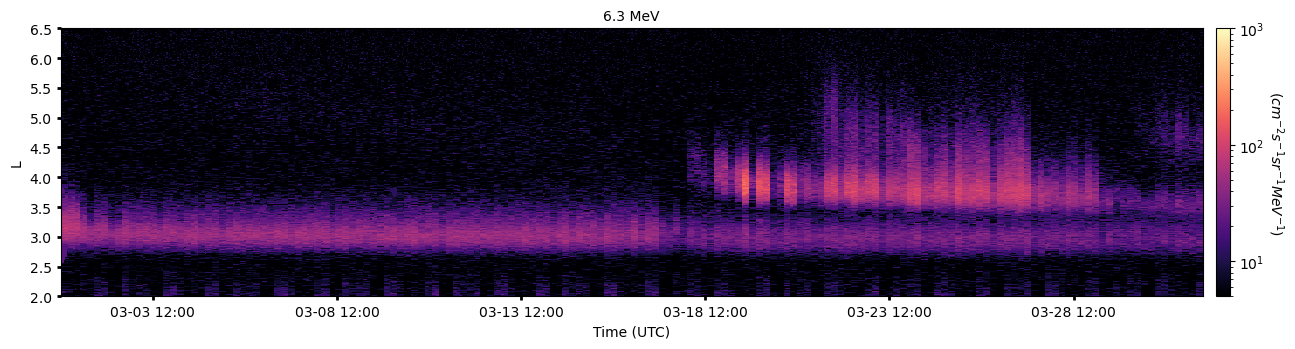

In [20]:
fig, axs = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(16 * scale, 4 * scale)
plot_L_vs_Time(refs=data, energy_channel=EnergyChannel.MeV_6_3, flux_max=1e3, axis=axs)

xticks = axs.get_xticks()
dt_xticks = spacepy.time.Ticktock(xticks, "JD").getUTC()
labels = [date.strftime("%m-%d %H:%M") for date in dt_xticks]
axs.set_xticks(xticks[1:-1], labels[1:-1])
axs.set_xlabel("Time (UTC)")
fig.tight_layout()
plt.show()

fig.savefig("./test.pdf", dpi=100, format="pdf")